In [139]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import scipy.misc
import imageio
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [2]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [97]:
# print(train_set_y)
print(train_set_x_orig.shape)
train_set_x=train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x=test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print(train_set_x.shape)
print(test_set_x.shape)
train_set_x=train_set_x/255
test_set_x=test_set_x/255
print ("train_set_x_flatten shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x[0:5,0]))

(209, 64, 64, 3)
(12288, 209)
(12288, 50)
train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [0.06666667 0.12156863 0.21960784 0.08627451 0.12941176]


In [98]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [103]:
def initialize_with_zeros(dim):
    w=np.zeros((dim,1))
    b=0
    return w,b
w,b=initialize_with_zeros(2)
print(w.shape)

(2, 1)


In [107]:
def propagate(w,b,X,Y):
    m = X.shape[1]
    t1=np.dot(w.T,X)+b
    a=sigmoid(t1)
    A=a-Y
    cost=-(np.sum(Y*np.log(a)+(1-Y)*np.log(1-a)))/m
    t2=A.sum()
    db=t2/m
    dw=1/m*np.dot(X,A.T)
    return cost,dw,db   
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost,x = propagate(w, b, X, Y)

In [108]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
    costs=[]
    for i in range(num_iterations):
        cost,dw,db=propagate(w,b,X,Y)
        w=w-learning_rate*dw
        b=b-learning_rate*db
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs

In [109]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067654


In [112]:
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    y=sigmoid(np.dot(w.T,X)+b)
    y_prediction=np.around(y)
    return y_prediction

In [113]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [114]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w,b=initialize_with_zeros(X_train.shape[0])
    params,grads,costs=optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    w=params["w"]
    b=params["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": costs,
     "Y_prediction_test": Y_prediction_test, 
     "Y_prediction_train" : Y_prediction_train, 
     "w" : w, 
     "b" : b,
     "learning_rate" : learning_rate,
     "num_iterations": num_iterations}
    
    return d

In [135]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 5000, learning_rate = 0.005, print_cost = False)

train accuracy: 100.0 %
test accuracy: 70.0 %


y = 1, you predicted that it is a "1.0" picture.


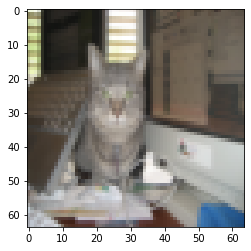

In [132]:
index = 7
plt.imshow(test_set_x[:,index].reshape((64, 64, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + str(d["Y_prediction_test"][0,index]) +  "\" picture.")

(12288, 1)
y = 0.0, your algorithm predicts a "non-cat" picture.


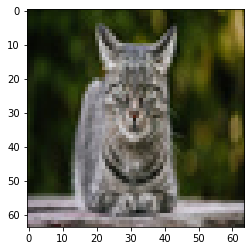

In [159]:
my_image = "ss.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(imageio.imread(fname))
image = image/255.
image_r=image.reshape(64*64*3,1)
print(image_r.shape)
# my_image = np.array(Image.fromarray(image).resize())
# scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], image_r)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")